In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_curve,roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("D:\\Project_Jntuk\\Using_Files\\heart-disease-uci\\heart.csv")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
duplicate = df[df.duplicated()]
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df.isna().sum()
null = df[df.isna().any(axis=1)]
null

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002612590F488>,
      dtype=object)

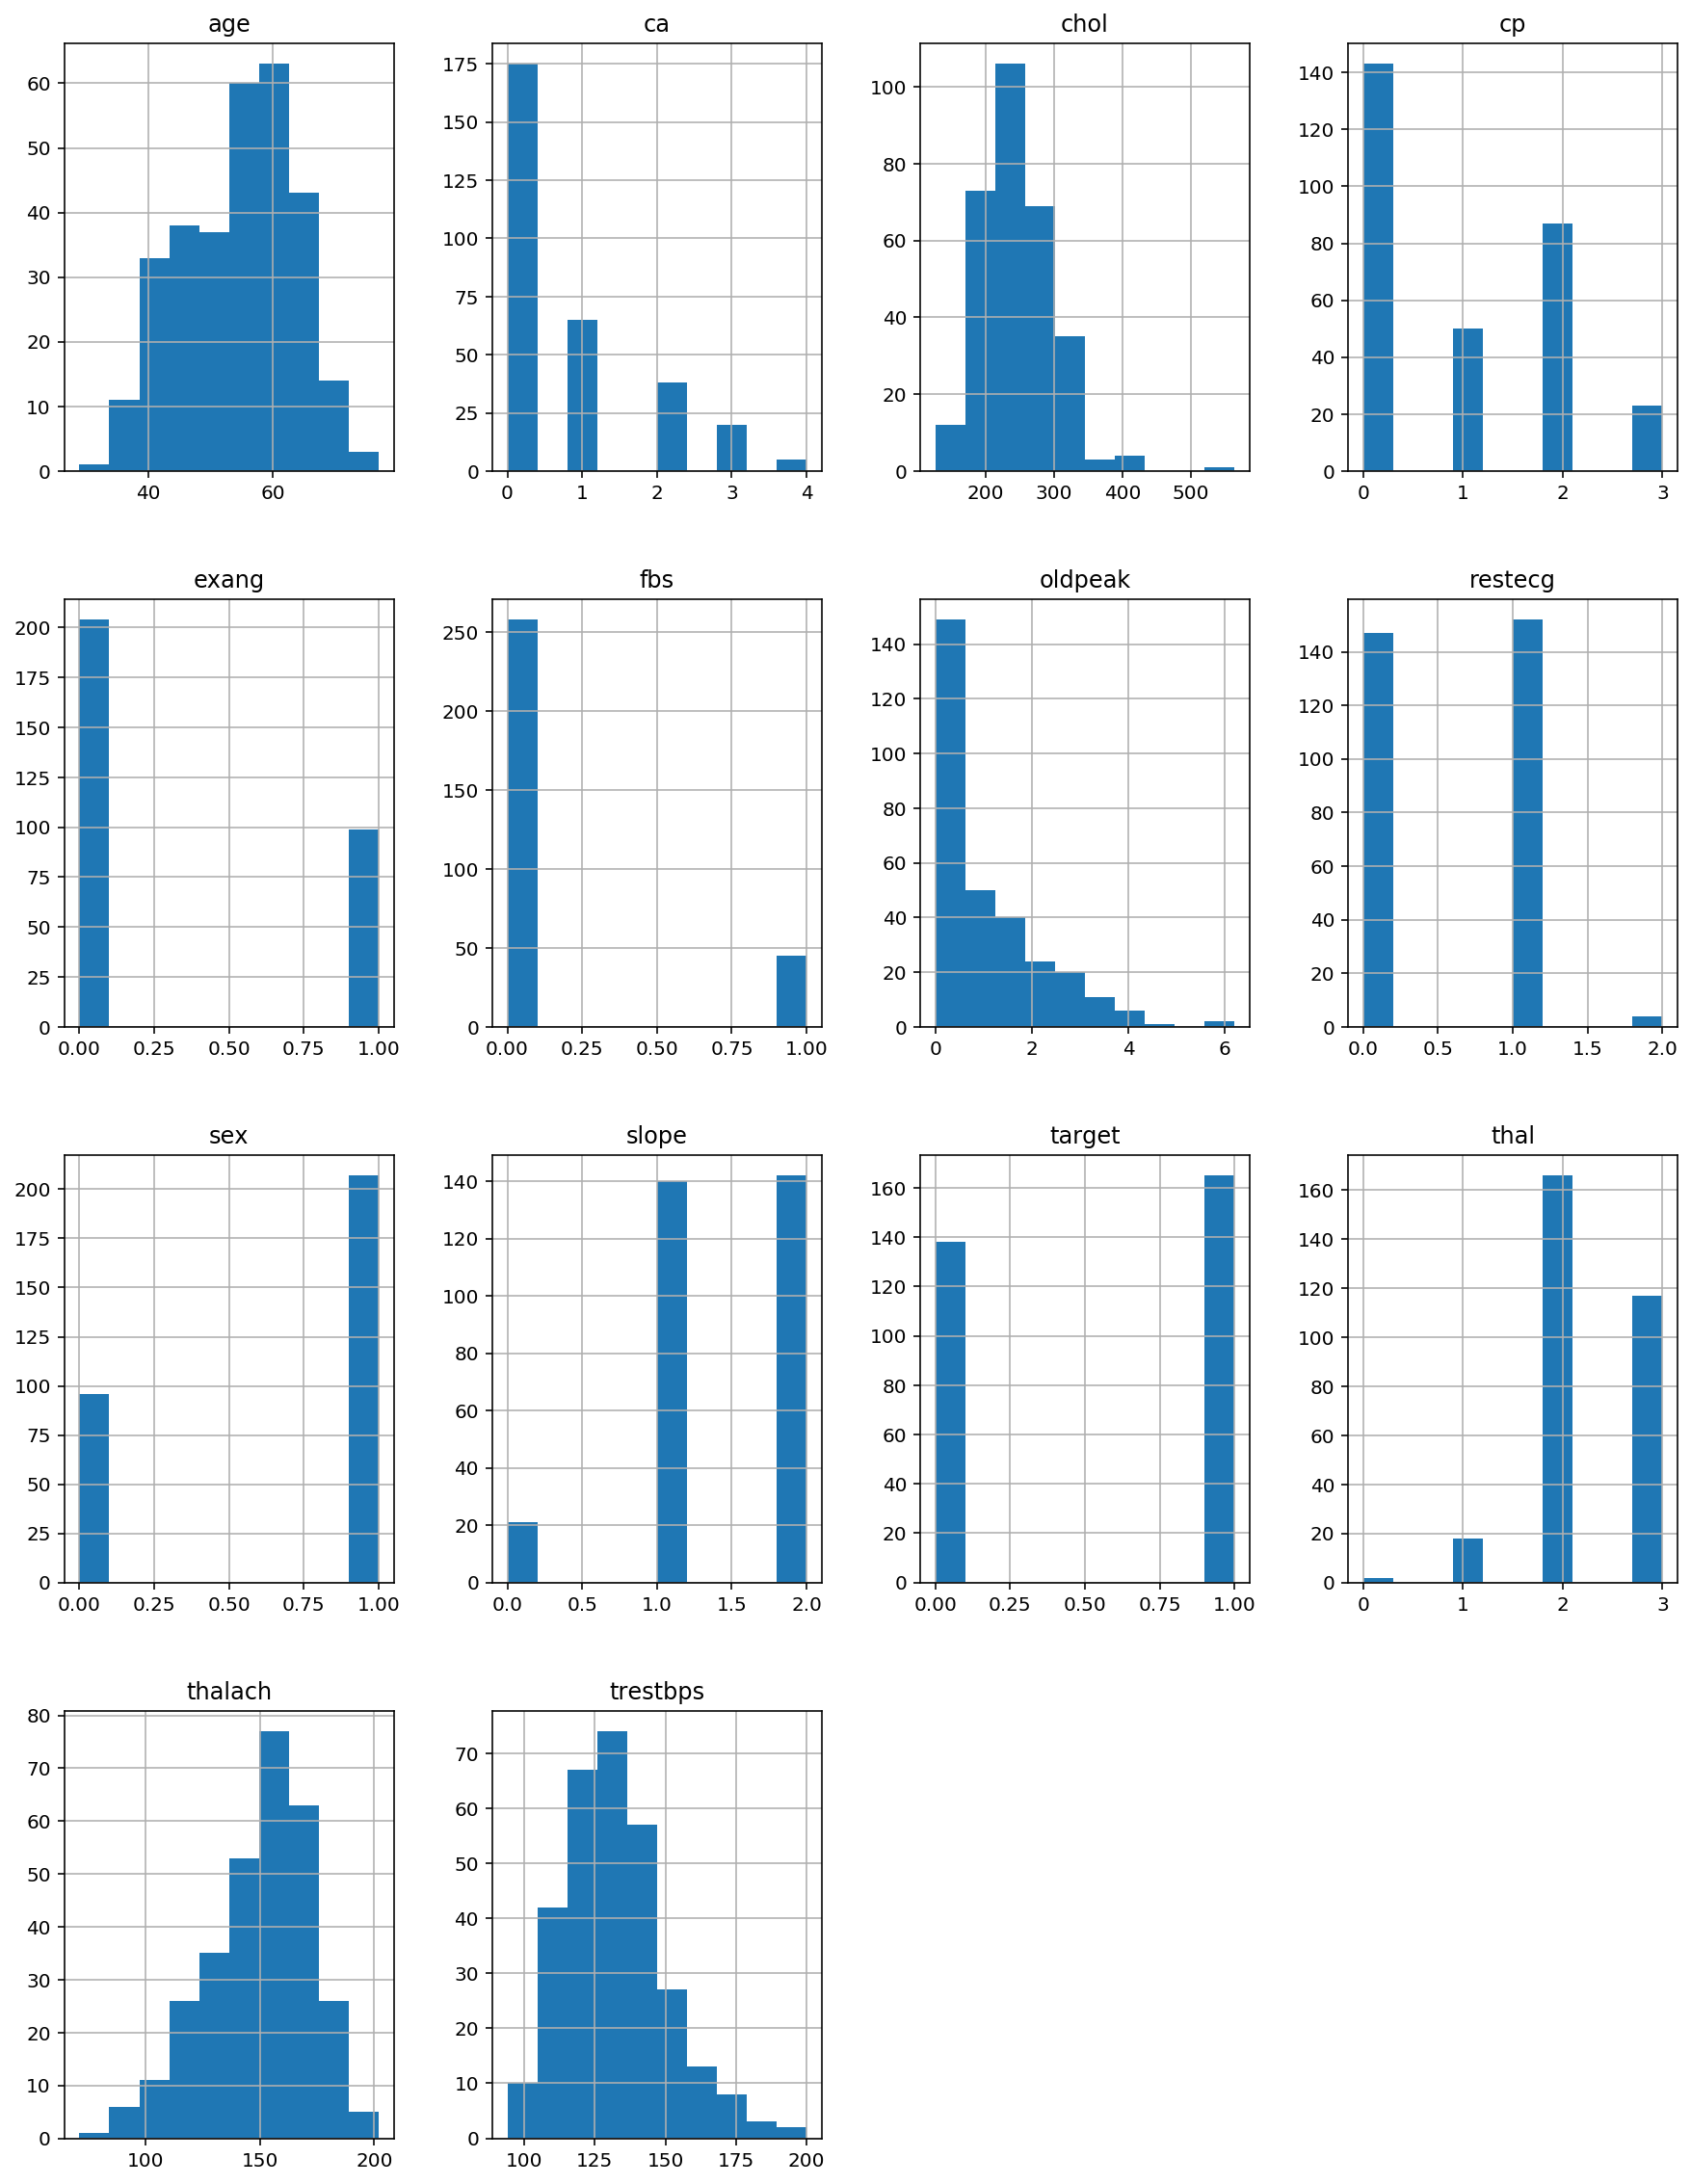

In [10]:
fig = plt.figure(figsize=(15,20))
ax = fig.gca()
df.hist(ax=ax)

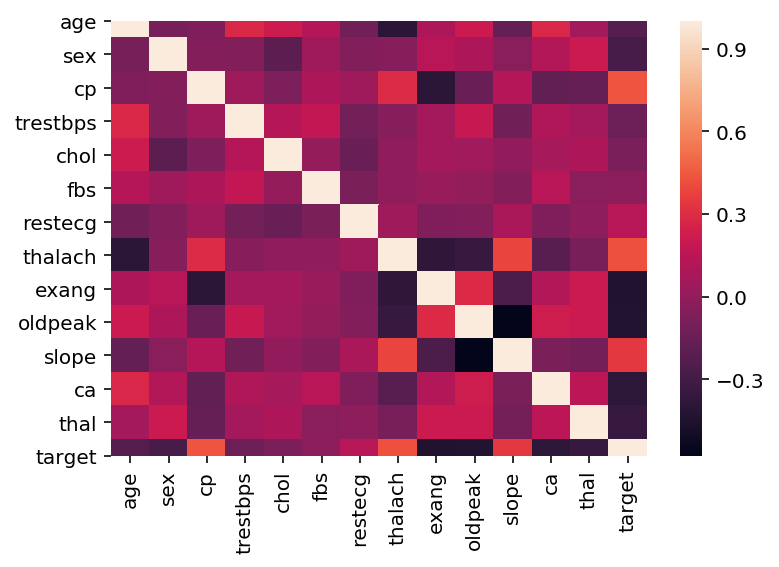

In [11]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df = df.drop(['age'],axis=1)
df.isna().sum()

sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df = df.dropna()
df.isna().sum()
df.columns

sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
from sklearn.feature_selection import SelectKBest,chi2
x = df.iloc[0:,0:13]
y = df.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(11,'Score'))

       Specs       Score
6    thalach  188.320472
12    target  138.000000
8    oldpeak   72.644253
10        ca   66.440765
1         cp   62.598098
7      exang   38.914377
3       chol   23.936394
2   trestbps   14.823925
9      slope    9.804095
0        sex    7.576835
11      thal    5.791853


In [19]:
featureScores = featureScores.sort_values(by='Score',ascending=False)
featureScores

,Specs,Score
6,thalach,188.320472
12,target,138.000000
8,oldpeak,72.644253
10,ca,66.440765
1,cp,62.598098
7,exang,38.914377
3,chol,23.936394
2,trestbps,14.823925
9,slope,9.804095
0,sex,7.576835


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 13 columns):
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(12)
memory usage: 33.1 KB


<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

Text(0.5, 0, '\nFeatures')

Text(0, 0.5, 'Importance\n')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text yticklabel objects>)

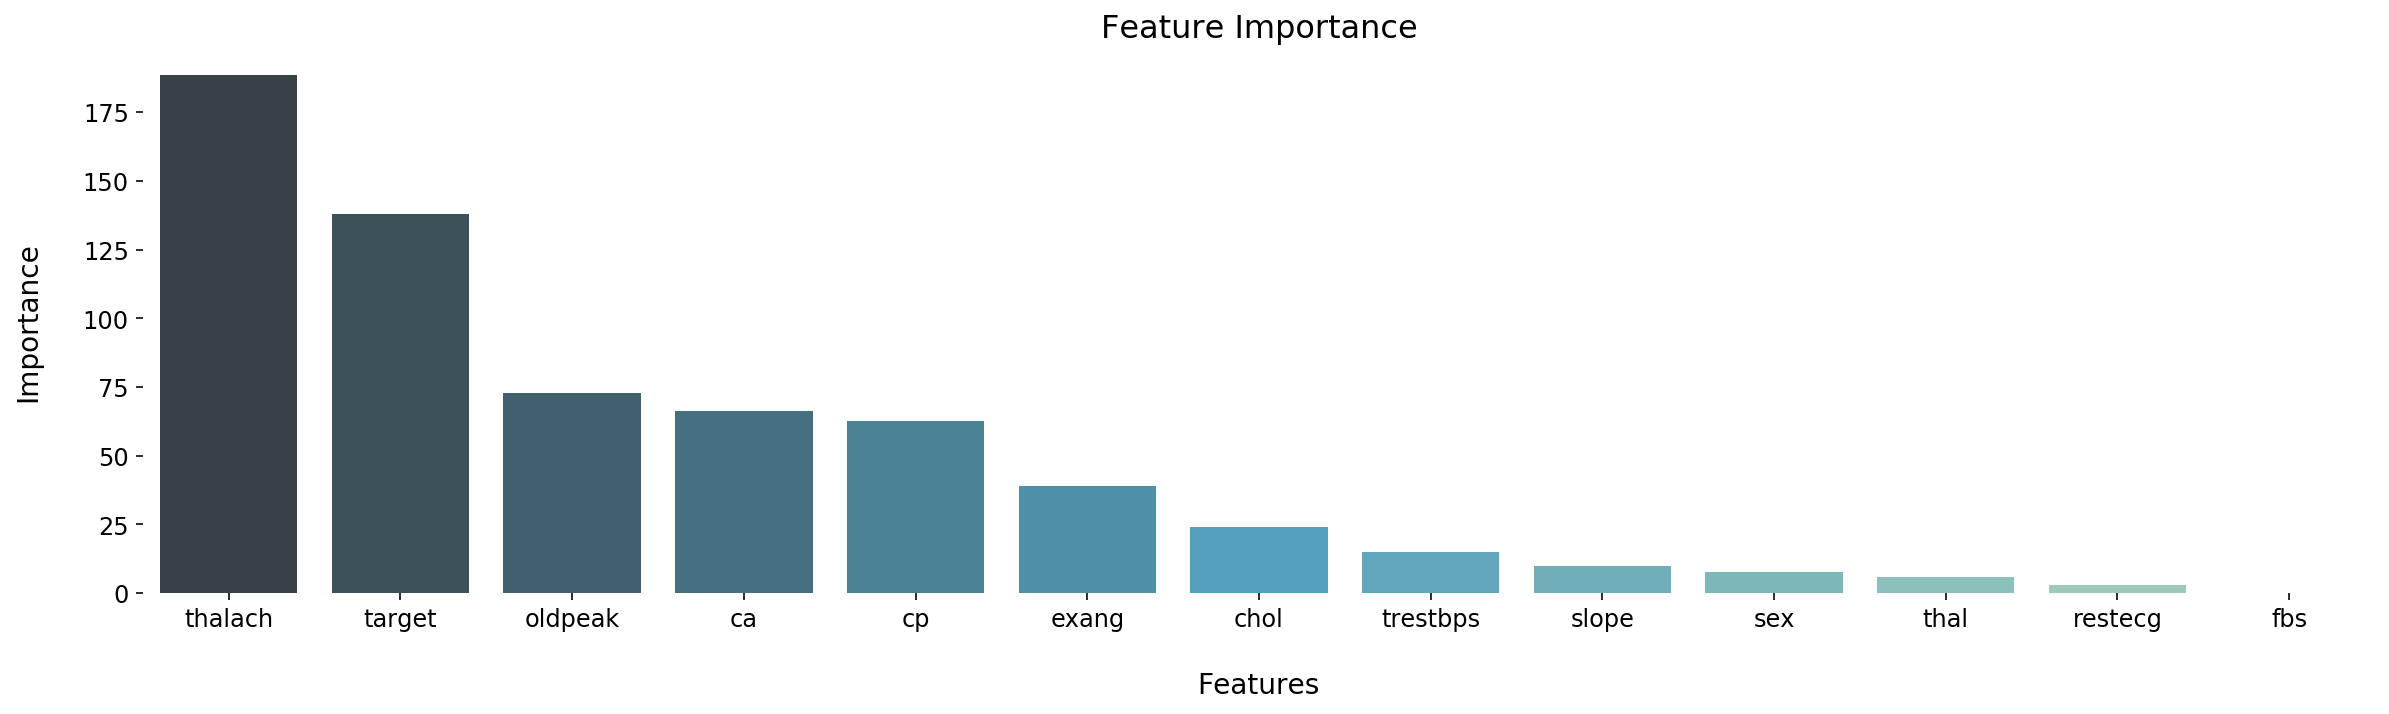

In [22]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs',y='Score',data=featureScores,palette="GnBu_d")
plt.box(False)
plt.title('Feature Importance',fontsize=16)
plt.xlabel('\nFeatures',fontsize=14)
plt.ylabel('Importance\n',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [23]:
feature_list = featureScores["Specs"].tolist()[:10]
feature_list

['thalach',
 'target',
 'oldpeak',
 'ca',
 'cp',
 'exang',
 'chol',
 'trestbps',
 'slope',
 'sex']

In [24]:
df = df[['thalach','target','oldpeak','ca','cp','exang','chol','trestbps','chol','trestbps','slope','sex']]
df.head()

,thalach,target,oldpeak,ca,cp,exang,chol,trestbps,chol,trestbps,slope,sex
0,150,1,2.3,0,3,0,233,145,233,145,0,1
1,187,1,3.5,0,2,0,250,130,250,130,0,1
2,172,1,1.4,0,1,0,204,130,204,130,2,0
3,178,1,0.8,0,1,0,236,120,236,120,2,1
4,163,1,0.6,0,0,1,354,120,354,120,2,0


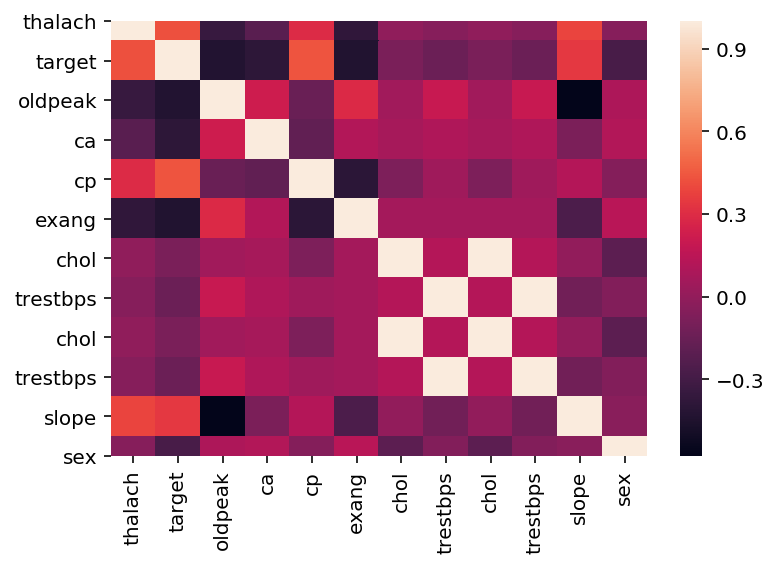

In [25]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [27]:
df.describe()

,thalach,target,oldpeak,ca,cp,exang,chol,trestbps,chol,trestbps,slope,sex
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,149.646865,0.544554,1.039604,0.729373,0.966997,0.326733,246.264026,131.623762,246.264026,131.623762,1.399340,0.683168
std,22.905161,0.498835,1.161075,1.022606,1.032052,0.469794,51.830751,17.538143,51.830751,17.538143,0.616226,0.466011
min,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,94.000000,126.000000,94.000000,0.000000,0.000000
25%,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,211.000000,120.000000,211.000000,120.000000,1.000000,0.000000
50%,153.000000,1.000000,0.800000,0.000000,1.000000,0.000000,240.000000,130.000000,240.000000,130.000000,1.000000,1.000000
75%,166.000000,1.000000,1.600000,1.000000,2.000000,1.000000,274.500000,140.000000,274.500000,140.000000,2.000000,1.000000
max,202.000000,1.000000,6.200000,4.000000,3.000000,1.000000,564.000000,200.000000,564.000000,200.000000,2.000000,1.000000


,thalach,target,oldpeak,ca,cp,exang,chol,trestbps,chol,trestbps,slope,sex


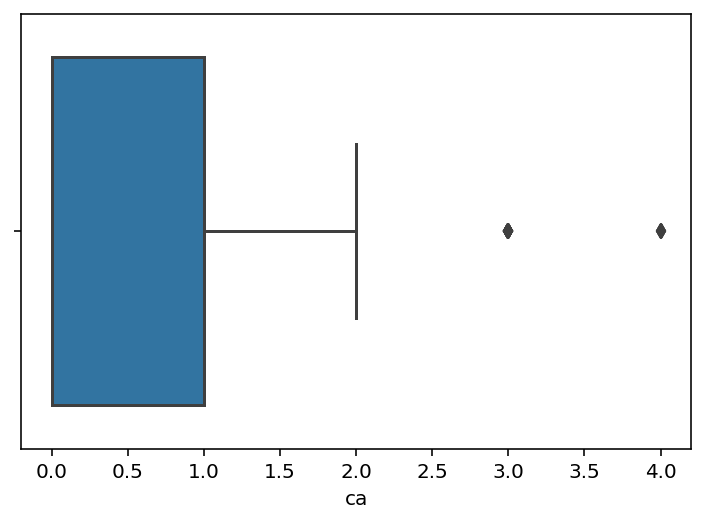

In [37]:
sns.boxplot(df.ca)
outliers = df[(df['ca']>600)]
outliers

In [38]:
df_clean = df
df_clean

,thalach,target,oldpeak,ca,cp,exang,chol,trestbps,chol,trestbps,slope,sex
0,150,1,2.3,0,3,0,233,145,233,145,0,1
1,187,1,3.5,0,2,0,250,130,250,130,0,1
2,172,1,1.4,0,1,0,204,130,204,130,2,0
3,178,1,0.8,0,1,0,236,120,236,120,2,1
4,163,1,0.6,0,0,1,354,120,354,120,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,123,0,0.2,0,0,1,241,140,241,140,1,0
299,132,0,1.2,0,3,0,264,110,264,110,1,1
300,141,0,3.4,2,0,0,193,144,193,144,1,1
301,115,0,1.2,1,0,1,131,130,131,130,1,1


In [39]:
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean),columns=df_clean.columns)
df_scaled.describe()
df.describe()

,thalach,target,oldpeak,ca,cp,exang,chol,trestbps,chol,trestbps,slope,sex
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.600358,0.544554,0.167678,0.182343,0.322332,0.326733,0.274575,0.354941,0.274575,0.354941,0.699670,0.683168
std,0.174849,0.498835,0.187270,0.255652,0.344017,0.469794,0.118335,0.165454,0.118335,0.165454,0.308113,0.466011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.477099,0.000000,0.000000,0.000000,0.000000,0.000000,0.194064,0.245283,0.194064,0.245283,0.500000,0.000000
50%,0.625954,1.000000,0.129032,0.000000,0.333333,0.000000,0.260274,0.339623,0.260274,0.339623,0.500000,1.000000
75%,0.725191,1.000000,0.258065,0.250000,0.666667,1.000000,0.339041,0.433962,0.339041,0.433962,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,thalach,target,oldpeak,ca,cp,exang,chol,trestbps,chol,trestbps,slope,sex
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,149.646865,0.544554,1.039604,0.729373,0.966997,0.326733,246.264026,131.623762,246.264026,131.623762,1.399340,0.683168
std,22.905161,0.498835,1.161075,1.022606,1.032052,0.469794,51.830751,17.538143,51.830751,17.538143,0.616226,0.466011
min,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,94.000000,126.000000,94.000000,0.000000,0.000000
25%,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,211.000000,120.000000,211.000000,120.000000,1.000000,0.000000
50%,153.000000,1.000000,0.800000,0.000000,1.000000,0.000000,240.000000,130.000000,240.000000,130.000000,1.000000,1.000000
75%,166.000000,1.000000,1.600000,1.000000,2.000000,1.000000,274.500000,140.000000,274.500000,140.000000,2.000000,1.000000
max,202.000000,1.000000,6.200000,4.000000,3.000000,1.000000,564.000000,200.000000,564.000000,200.000000,2.000000,1.000000


In [52]:
y = df_scaled['exang']
X = df_scaled.drop(['exang'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=29)

In [53]:
len(X_train)
len(X_test)

242

61

Class 0: 204
Class 1: 99
Proportion: 2.06 :1


Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

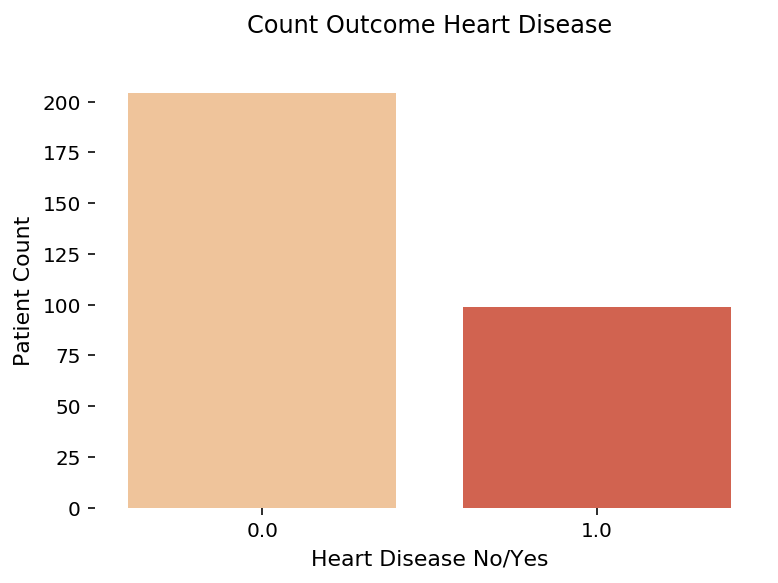

In [54]:
#Resampling imbalanced dataset:
target_count = df_scaled.exang.value_counts()
print('Class 0:',target_count[0])
print('Class 1:',target_count[1])
print('Proportion:',round(target_count[0]/target_count[1],2),':1')
sns.countplot(df_scaled.exang,palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

0.0    150
1.0     99
Name: exang, dtype: int64

Text(0.5, 0, 'Heart Disease NO/YES')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

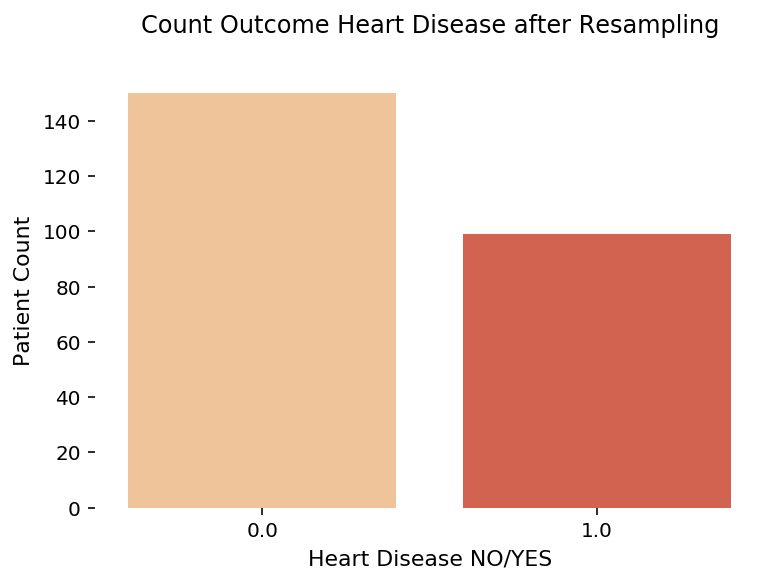

In [59]:
#UnderSampling Method:
#shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)
#put all the fraud class in separate dataset:
CHD_df = shuffled_df.loc[shuffled_df['exang']==1]
#randomly slect 492 observations from the non fraud(majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['exang']== 0].sample(n=150,random_state=42)
#concatenate both dataframes again
normalized_df = pd.concat([CHD_df,non_CHD_df])
#check new class counts:
normalized_df.exang.value_counts()
#plot new count:
sns.countplot(normalized_df.exang,palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease NO/YES',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

In [60]:

y_train = normalized_df['exang']
X_train = normalized_df.drop('exang', axis=1)

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))

Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

The accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is: 75.41%


Pipeline(memory=None,
         steps=[('classifier',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

The accuracy score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) is: 70.49%


Pipeline(memory=None,
         steps=[('classifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

The accuracy score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') is: 91.80%


Pipeline(memory=None,
         steps=[('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=2, p=2,
                                      weights='uniform'))],
         verbose=False)

The accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform') is: 93.44%
